# Introduction to Machine Learning

Wim Wiegerinck

revised September 28, 2022

# Computer self-study on Gaussians

The material in this self-study assignment is related to Bishop Appendix C (Properties of matrices) and Chapter 2.3 (Gaussian Distribution)

Content:
- Linear algebra, matrix multiplications and eigenvectors
- Multivariate Gaussians:
 - Visuallzation of 2D Gaussians
 - Random sampling from Gaussians
 - Conditional and Marginal Gaussian Distributions
 - Linear Gaussian Model and Bayes' Rule

## Linear algebra, matrix multiplication and eigenvectors
There are several ways for matrix multipliation in Python 3. I found using the `@` operator the most convenient. Below is an example. Verify (at least some of) the results e.g. by calculation by hand.

In [30]:
import numpy as np

A = np.array([[1,2,3], [3,4,5]]) # a matrix   A.T is the transposed. A[:,0] is the first column, A[0,:] is the first row etc.
v = np.array([1,2,4])          # a vector  
B = np.array([[5,6], [7,8]])

# verify (e.g. by calclulation by hand) that the following expressions are equal to what you expected
# 
print('A=\n{0}\n'.format(A))

print('A[:,0]=\n{0}\n'.format(A[:,0]))

print('A.T[:,0]=\n{0}\n'.format(A.T[:,0]))

print('A[0,:]=\n{0}\n'.format(A[0,:]))

print('v=\n{0}\n'.format(v))

print('A@v=\n{0}\n'.format(A@v))

print('v@A.T=\n{0}\n'.format(v@A.T))

print('B@A@v=\n{0}\n'.format(B@A@v))

A=
[[1 2 3]
 [3 4 5]]

A[:,0]=
[1 3]

A.T[:,0]=
[1 2 3]

A[0,:]=
[1 2 3]

v=
[1 2 4]

A@v=
[17 31]

v@A.T=
[17 31]

B@A@v=
[271 367]



In the following we will do some linear algebra. In order to do this in Python we import the linear algebra library. We define a (symmetric) matrix $A$. With the linear algebra library, we can compute, e.g. its inverse $B = A^{-1}$
Verify with three digit precision that 
1. $B$ is symmetric
2. $A B = B A = I$

In [3]:

A = np.array([[3,1.5,1],[1.5,2,1],[1,1,1.5]])
B=np.linalg.inv(A)            # B is the inverse of A

# Verify that B is symmetric.
print('B=\n{0}\n'.format(B))        

# What is A@B? and B@A
print('A@B=\n{0}\n'.format(A@B))

print('B@A=\n{0}'.format(B@A))

B=
[[ 0.55172414 -0.34482759 -0.13793103]
 [-0.34482759  0.96551724 -0.4137931 ]
 [-0.13793103 -0.4137931   1.03448276]]

A@B=
[[ 1.00000000e+00 -5.55111512e-17  0.00000000e+00]
 [-1.11022302e-16  1.00000000e+00  0.00000000e+00]
 [-5.55111512e-17 -8.32667268e-17  1.00000000e+00]]

B@A=
[[ 1.00000000e+00 -2.77555756e-17 -4.16333634e-17]
 [-2.22044605e-16  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


(Note that in the numerical computation of $A^{-1}A$, you may encounter some very small numerical deviations from e.g. zero - sometimes these can cause serious problems, but here and later in this document, we don't worry about them.)

### Eigenvectors and eigenvalues
In the following code blocks, we compute its eigenvalues and eigenvectors. If you are not familiar with one or more of these concepts, please read Bishop appendix C, "Eigenvalue Equation". In some of the calculations below we refer back to that section.

In [4]:
# Eigenvalues and eigenvectors (of symmetrix matrices). 
# Read Bishop Appendix C Eigenvector equation for a recap

[lambdas,U] = np.linalg.eig(A)  

    
# lambdas is a vector with all the eigenvalues [lambda1, lambda2, etc.]  
#(so lambda1 = lambdas[0], lambda2 = lambdas[1] etc.)
# U is the matrix of all eigenvectors, so u1 = U[:,0] is the eigenvector with eigenvalue lambda1, 
# u2 = U[:,1] is the eigenvector with eigenvalue lambda2   etc
print('eigenvalues = {0} \n'.format(lambdas))
print('eigenvectors = \n{0}'.format(U))

eigenvalues = [4.69387763 1.11099606 0.69512631] 

eigenvectors = 
[[ 0.72851788  0.66260047  0.17384567]
 [ 0.55480803 -0.42185901 -0.71709346]
 [ 0.4018081  -0.61886638  0.67494789]]


So, in this example, the first eigenvalue is $\lambda_1 = 4.69387763$ and the first eigenvector is

$$\mathbf{u}_1 = \begin{pmatrix} 0.72851788 \\ 0.55480803 \\ 0.4018081 \end{pmatrix} $$

As explained in Bishop, the eigenvalues $\lambda_i$ and the eigenvectors $\mathbf{u}_i$ satisfy the equation (Bishop C.29)

$$ A\mathbf{u}_i = \lambda_i \mathbf{u}_i $$

The eigenvectors of unequal eigenvalues are orthogonal (so inner product $\mathbf{u}_i^T \cdot \mathbf{u}_j = 0 $ if $\lambda_i \neq \lambda_j$) and can be made orthonormal by the scaling eigenvectors as in (Bishop C.33). 

In the code block below we verify (partially) the eigenvector equation (Bishop C.27) and verify that the eigenvectors are orthonormal (Bishop C.33)  

In [5]:
# verify that A @ U[:,0] = lambdas[0] * U[:,0]  (Bishop C.27)
# verify that U[:,0] and  U[:,1] are orthogonal (Bishop C.33)
# verify that U[:,0] is normalized              (Bishop C.33)

# answers: check
print('A@U[:,0] = \n',A@U[:,0])
print('\n which should be the same as \n')
print('lambdas[0]*U[:,0] = \n',lambdas[0]*U[:,0])
print('\n')
print('U[:,0].T @ U[:,1] = ',U[:,0].T @ U[:,1], '\n which should be 0')
print('\n')
print('U[:,0].T @ U[:,0] = ',U[:,0].T @ U[:,0], '\n which should be 1')

A@U[:,0] = 
 [3.41957379 2.60420098 1.88603806]

 which should be the same as 

lambdas[0]*U[:,0] = 
 [3.41957379 2.60420098 1.88603806]


U[:,0].T @ U[:,1] =  -1.3877787807814457e-16 
 which should be 0


U[:,0].T @ U[:,0] =  1.0 
 which should be 1


Next, we define the matrix `Lambda`

$$ \Lambda = \begin{pmatrix} \lambda_1 & 0 & 0 \\ 0 & \lambda_2 & 0 \\ 0 & 0 & \lambda_3 \end{pmatrix} $$

Use this matrix to check the relations Bishop C.37, C.42, C.43, C.44. To check if two arrays are equal, you may use the function `np.allclose(A, B)`, which checks if all entries are equal up to a small tolerance. The equations that you have to verify are written in the comments (where `LambdaInv` is $\Lambda^{-1}$).

1. Complete the code below and run.

In [ ]:
Lambda = np.diag(...)
LambdaInv = np.diag(...)

#Check
# U.T@U = I                (C.37)  Definition orthogonal matrix
# U.T@A@U = Lambda         (C.42)
# U@Lambda@U.T = A         (C.43)
# U@LambdaInv@U.T = A^{-1} (C.44)   

print("Equation (C.37) is {0}".format(np.allclose(..., ...)))
print("Equation (C.42) is {0}".format(np.allclose(..., ...)))
print("Equation (C.43) is {0}".format(np.allclose(..., ...)))
print("Equation (C.44) is {0}".format(np.allclose(..., ...)))

In [29]:
# %load -r 1-14 answers4.py

## Multivariate Gaussians
Now we are going to explore multivariate Gaussians. Here is code how to sample from a 2D Gaussian with a certain mean vector (mu) and a covariance matrix (Sigma). By setting the seed, we get the same results if we repeat this code block.

In [8]:
mu = [-2, 3]                     # mean vector
Sigma = [[1, 0.9], [0.9, 2]]     # Covariance matrix

# set seed for reproducibility
np.random.seed(0)

# Generate 5000 data points x,y from a Gaussian 
N = 5000   # sample size
x, y = np.random.multivariate_normal(mu, Sigma, N).T

Does the data have the same mean and covariance as defined in mu and Sigma? With these routines this can be checked:

In [9]:
datamean = np.mean([x, y], axis=1)
datacov =np.cov([x, y])
print('data mean = \n{0}\n'.format(datamean))
print('data covariance = \n{0}'.format(datacov))

data mean = 
[-1.97318263  3.02725226]

data covariance = 
[[0.97245793 0.88637498]
 [0.88637498 1.9721044 ]]


Answer: not exactly. Why is that? If you are not sure, repeat the experiment (sample N data points, compute data mean and data covariance) with different sample sizes N.

### Visualization of 2-D Gaussians
The following code contains routines to make a scatterplot of the 5000 dat points. Note that I had to do some coding to get the $x$-axis and the $y$-axis equal in scale.

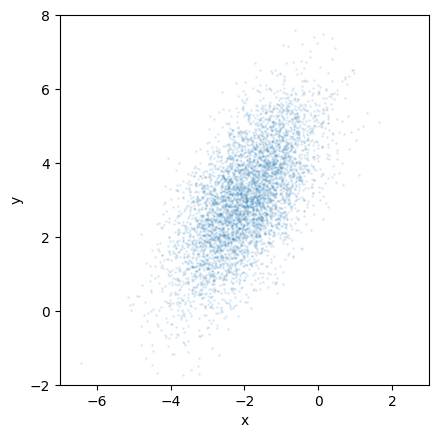

In [10]:
import matplotlib.pyplot as plt    # for plotting, as usual
fig,ax = plt.subplots()  # prepare plot

ax.scatter(x, y, s=1, alpha=0.1)  # make a scatter plot of all data points. 
# s: marker size
# alpha: blending value, between 0 (transparent) and 1 (opaque).

# I want equal axes (shifted by mu), see https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/axis_equal_demo.html
mybound=5
# to reuse this piece of code, I make a function
def set_axes(ax, mybound, mu):
    ax.axis([-mybound+mu[0], mybound+mu[0], -mybound+mu[1], mybound+mu[1]])  
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

set_axes(ax, mybound, mu)
plt.show()

Python (scipy.stats) also has an implementation of the Gaussian probability density function (pdf). We can evaluate the pdf for a grid of points and use these to plot a contour of the pdf. On top of this we plot the sampled data.

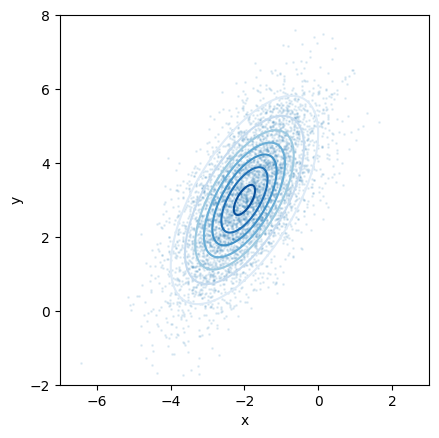

In [11]:
from scipy.stats import multivariate_normal
pxy = multivariate_normal(mu, Sigma)

# the following is to prepare the meshgrid needed for the contour plot
dx = dy = 0.01
x1 = np.arange(-mybound+mu[0], mybound+mu[0], dx)
y1 = np.arange(-mybound+mu[1], mybound+mu[1], dy)
x1, y1 = np.meshgrid(x1, y1)
pos = np.dstack((x1, y1))

# prepare plot
fig, ax = plt.subplots()  

# contour plot. 
# cmap is the colormap, (see Choosing Colormaps in Matplotlib website)
ax.contour(x1, y1, pxy.pdf(pos), cmap='Blues')

ax.scatter(x, y,s=1,alpha=0.1)  # these were our 5000 samples
set_axes(ax, mybound, mu)       # this function that I defined for equal axes
plt.show()

To make the visualization of the Gaussian complete, we can draw arrows in the plot for the mean vector and both eigenvectors of the covariance matrix, multiplied by $\sqrt{\lambda_i}$, as in Bishop Figure 2.7.

Note that in the code below, the direction of one of the eigenvectors is reversed (because I wanted them to point upwards). Is this allowed? If you are not sure, verify mathematically that if $\mathbf{u}_i$ is an eigenvector of the matrix $\mathbf{A}$ with eigenvalue $\lambda_i$, that $-\mathbf{u}_i$ is also an eigenvector of $\mathbf{A}$ with the same eigenvalue.

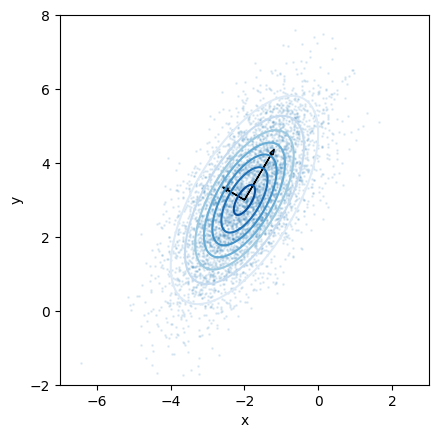

In [13]:
# prepare plot
fig, ax = plt.subplots()  
ax.contour(x1, y1, pxy.pdf(pos), cmap='Blues') # the contour plot  
ax.scatter(x, y,s=1,alpha=0.1)  # these were our 5000 samples

#Eigenvalues and eigenvectors
[lambdas,U] = np.linalg.eig(Sigma)   

# Square-roots of the eigenvalues 
l0, l1 = np.sqrt(lambdas)    

# The arrows are defined by the two eigenvectors U[:,0] and U[:,1] multiplied by  l0 and l1, 
# and start in the mean vector
# Note that I changed the direction of one of the eigenvectors for esthetic reasons
# See matplotlib.pyplot.arrow for explanation of the arrow function and its parameters
ax.arrow(mu[0], mu[1], l0*U[0,0], l0*U[1,0], length_includes_head = True, head_width=0.1)     
ax.arrow(mu[0], mu[1], -l1*U[0,1], -l1*U[1,1], length_includes_head = True, head_width=0.1)

set_axes(ax, mybound, mu)       # this function that was defined for equal axes
plt.show()

If we compare the Gaussian with mean $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$ to a Gaussian with zero mean ($\mathbf{\mu}=0$) and diagonal covariance matrix with eigenvalues on the diagonal, $\mathbf{\Sigma} = \begin{pmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix}$, we immediately see that these can be mapped onto each other by a translation of the center and a rotation of the contours.

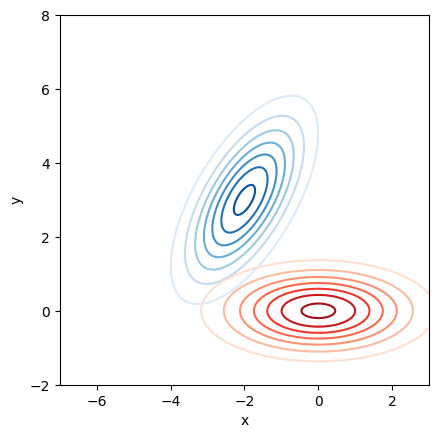

In [14]:
# I make a second pdf, but now mean zeros and cov defined by the diagonal matrix with of lambdas
Lambda = np.diag(-np.sort(-lambdas))        # I wanted the largest lambda first (x axis)
pxyL = multivariate_normal([0,0], Lambda)   # New Gaussian pdf with zero mean and diagonal cov

fig, ax = plt.subplots()  

ax.contour(x1, y1, pxy.pdf(pos), cmap='Blues')  # Our earlier pdf
ax.contour(x1, y1, pxyL.pdf(pos), cmap='Reds')  # New pdf created above

set_axes(ax, mybound, mu)       
plt.show()

### Conditional and marginal Gaussian distributions
We are going to verify Bishop's equations (2.94) to (2.98) by numerical conditioning and numerical integration of Python's Gaussian pdf.

First, let us draw the pdf of a 1-D Gaussian with a certain mean $\mu$ and a standard deviation $\sigma$. In this picture, I included some additional arrow and markers like in Bishop figure 1.13.

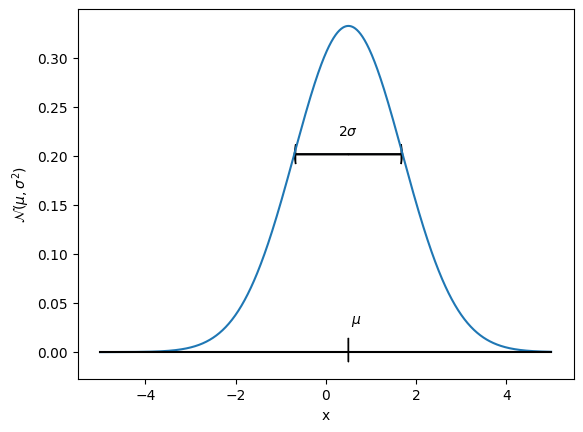

In [15]:
# Definition of 1 D Gaussian
mu = 0.5
sigma = 1.2
sigma2 = sigma**2
px = multivariate_normal(mu, sigma2)

# Let's plot
plt.figure()
x = np.arange(-5, 5, 0.01)
plt.plot(x,px.pdf(x))

# That's basically it. The following are just some lines, arrows and symbols to guide the eye
plt.plot(x, 0*x,'k')  # xaxis at y = 0 level
plt.arrow(mu, -0.01, 0, 0.02,  head_width=None)  # upward arrow starting from (mu,0) to (mu, px.pdf(mu))
plt.text(mu+0.06, 0.03, '$\mu$' )
plt.text(mu, px.pdf(mu+sigma) + 0.02, '$2 \sigma$', horizontalalignment='center')
plt.arrow(mu, px.pdf(mu+sigma), sigma, 0, length_includes_head = True, head_width=0.02)  # rightward arrow to indicate the standard deviation
plt.arrow(mu, px.pdf(mu+sigma), -sigma, 0, length_includes_head = True, head_width=0.02)  

plt.xlabel('x')
plt.ylabel('$\mathcal{N}(\mu,\sigma^2$)')
plt.show()

### Conditional  Gaussian: Exact with Matrices versus Numerical Conditioning
We will construct a 2-D Gaussian over the variables $x$ and $y$. Then we compute the conditional distribution $p(x | y=2)$ by numerical conditioning and compare the result with Bishop's equation (2.81-2.82). These are equivalent to (2.96-2.97), but maybe more convenient here.

First, we construct the 2-D Gaussian, and plot its contour together with the line $y=2$ similar to Bishop's Figure 2.9, left plot.

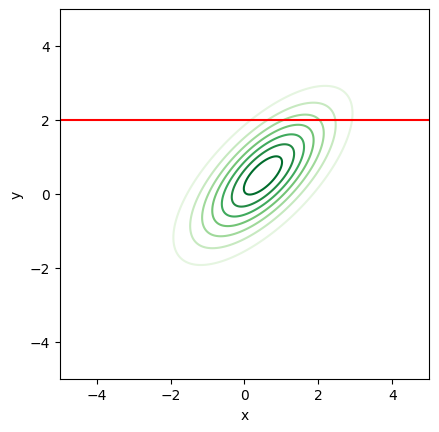

In [16]:
mu = np.array([0.5,0.5])                     # mean vector
Sigma = np.array([[1.44, 1], [1, 1.44]])     # Covariance matrix
pxy = multivariate_normal(mu, Sigma)

# the following is to prepare the meshgrid needed for the contour plot
x = y = np.arange(-5, 5, 0.01)
x1, y1 = np.meshgrid(x, y)
pos1 = np.dstack((x1, y1))
fig, ax = plt.subplots()  
plt.contour(x1, y1, pxy.pdf(pos1), cmap='Greens')  # similar to fig 2.9 (right)

# the condition
yc = 2    

yclong = yc*np.ones(y.shape)    # needed for the plot
plt.plot(x,yclong,'r')          # similar to fig 2.9 (right)

set_axes(ax, 5, [0,0])  
plt.show()

Now the numerical conditioning. We will make use of Bishop (1.31 and (1.32), which in our case result in

$$ p(x | y=2) = \frac{p(x, y=2)}{\int p(x, y=2) dx} $$ 

In the following code, with `yc=2`, this is done in the definition of `p_xGIVENyc_Numericalpdf`. Why did I multiply with $0.01$ in the denominator?

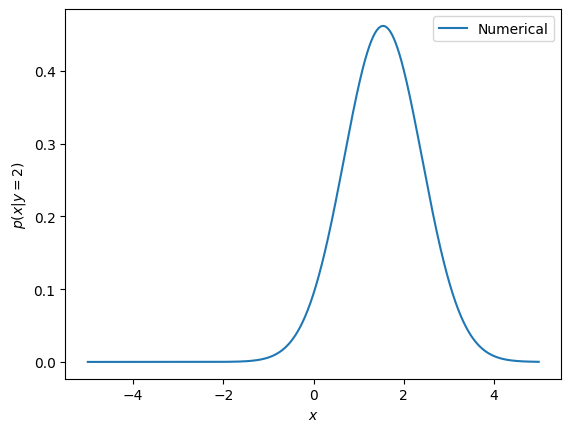

In [19]:
x1c, y1c = np.meshgrid(x, yc)
posc = np.dstack((x1c, y1c))  # I need to evaluate the pdf in all these points

# Now the (simplistic) numerical conditioning
# Question: why did I multiply with 0.01?
p_xGIVENyc_Numericalpdf = pxy.pdf(posc)/np.sum(pxy.pdf(posc)*0.01)

# and plot again
fig = plt.figure()
plt.plot(y, p_xGIVENyc_Numericalpdf, label='Numerical')
plt.xlabel('$x$')
plt.ylabel('$p(x|y={})$'.format(yc))
plt.legend()
plt.show()

Now we will compare with the exact conditional Gaussian by applying Bishop (2.81) and (2.82). 

1. Compute $\Sigma_{x|y_c}$ and $\mu_{x|y_c}$ and fill in the dots in first two lines in the code below.

Then we plot the exact conditional on top of the numerical result. We increase the thickness of a plotted line by adding `linewidth=...` in the arguments (e.g. `plt.plot(x, y, linewidth=10)`). By increasing the linewidth of the plot above and plotting the exact conditional afterwards (on top of the numerical), both are visible.

In [ ]:
# Use Bishop 2.81 & 2.82 to compute mu_xGIVENyc Sigma_xGIVENyc from mu, Sigma and yc
Sigma_xGIVENyc = ...
mu_xGIVENyc    = ...

# and with these, we define a Gaussian
p_xGIVENyc_Exact = multivariate_normal(mu_xGIVENyc, Sigma_xGIVENyc)

# and plot both on top of each other with BIG fatty lines to see them both
fig = plt.figure()
plt.plot(y,p_xGIVENyc_Numericalpdf, label='Numerical', linewidth=10)
plt.plot(y,p_xGIVENyc_Exact.pdf(y),label = 'Exact', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$p(x|y={})$'.format(yc))
plt.legend()
                            
                            
plt.show()

In [28]:
# %load -r 49-65 answers4.py

### Marginal Gaussian: Exact with Matrices versus Numerical Marginalization
To compute the marginal $p(x)$, we use Bishop (1.31) $$ p(x) = \int p(x, y) dy$$ First we compute the marginal numerically. 

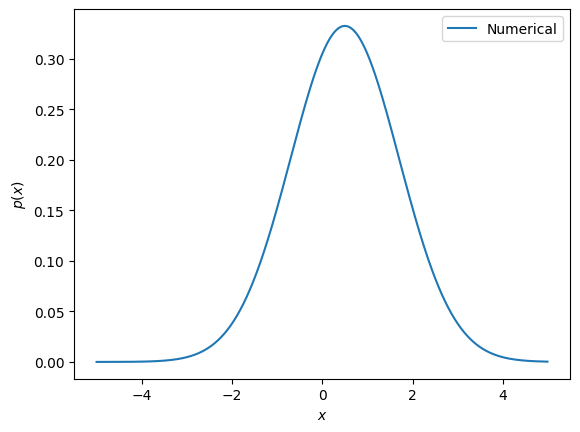

In [21]:
#Numerical marginalization
# I need to evaluate the pdf in all these points
x1 = np.arange(-5, 5, 0.01)
y1 = np.arange(-5, 5, 0.01)
x1, y1 = np.meshgrid(x1,y1)
pos = np.dstack((x1, y1))

# Marginalization is integration over y (axis=1)
p_x_Numericalpdf = np.sum(pxy.pdf(pos),axis=1) * 0.01 

# and plot 
fig = plt.figure()
plt.plot(x,p_x_Numericalpdf, label='Numerical')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
                                                        
plt.show()

We will compare the numerically determined marginals with the exact marginal Gaussian by applying Bishop (2.98). 

1. Use Bishop 2.98 to compute $\mu_x, \Sigma_x$ from $\mu, \Sigma$ exactly and complete the code below (indicated with ... ). 

Then we plot the numerical and exact marginal on top of each other like before. Again, you should get an almost perfect fit between the numerical and exact marginalization.

In [ ]:
# Eact marginalization
# Use Bishop 2.98 to compute mu_x Sigma_x from mu, Sigma 
Sigma_x = ...
mu_x    = ...

# and with these, define a Gaussian
p_x_Exact = multivariate_normal(..., ...)

# and plot both on top of each other with BIG fatty lines to see them both
fig = plt.figure()
plt.plot(x,p_x_Numericalpdf, label='Numerical', linewidth=10)
plt.plot(x,p_x_Exact.pdf(x),label = 'Exact', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
                                                        
plt.show()

In [27]:
# %load -r 76-93 answers4.py

### Linear Gaussian Model and Bayes' Rule
Assume we have a 1-D variable $x$ (e.g. a temperature). We want to estimate its value on the basis of $N$ independent noisy measurements $y_i = x + \epsilon$. In vector notation, the $N$ measurements are denoted as $\mathbf{y}$. Suppose that our prior knowledge about $x$ is that it is Gaussian distributed with $\mu = 0$ and $\sigma^2 = 1$. It is also given that the noise $\epsilon$ in the measurements is Gaussian distributed with $\mu=0$ and $\sigma^2=1$.

Question: What is $p(x)$, $p(\mathbf{y}|x)$, and $p(x|\mathbf{y})$ in this problem? use notation as in (2.113)-(2.117). How does the result depend on $N$?

Let us simulate the problem: The variable $x$ is generated from its prior distribution $p(x)$. Then $N$ measurements $\mathbf{y}$ are performed. Based on these measurements, we have to give our best guess about $x$ in terms of a posterior distribution $p(x|\mathbf{y})$.

Plot in one graph $x$ (this is just one single value), $p(x)$, and $p(x | \mathbf{y})$ for $N = 1, N=10, N=100$.

In [ ]:
# p(x)
px = multivariate_normal(...)

# one time the generation of x
x = np.random.randn(...)

fig = plt.figure()
x1 = np.arange(-5, 5, 0.01)
plt.plot(x1,px.pdf(x1), label='$p(x)$', linewidth=1)
plt.plot(x,0, '*', label='$x_{truth}$')

# For three values of N the observations y and p(x|y)
for N in np.array([1,10,100]):
    yvec = x + np.random.randn(N,1)
    A = ...
    L = ...
    Lambda= ...
    SigmaN = ...
    muN = ...
    px_y = multivariate_normal( ... , ...)
    plt.plot(x1,px_y.pdf(x1), label='$p(x|y), N={}$'.format(N))
plt.xlabel('x')
plt.legend()
plt.show()

In [26]:
# %load -r 95-118 answers4.py

Look at the results and try to understand them. You may want to rerun to see different results (which may be illustrative). What happens to the distribution $p(x|\mathbf{y})$ as you collect more samples?

## Make sure that you understand:
- Basic linear algebra. Matrix multiplications, matrix inverses, eigenvalues and eigenvectors of symmetric matrices (See Bishop appendix C)
- Multivariate Gaussians
 - The notation $\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})$
 - Covariance matrix, precision matrix and their relation (bishop 2.68)
 - The role and interpretation of the eigenvectors and eigenvalues of the covariance matrix
 - How doe the eigenvectors of the precision matrix relate to the eigenvectors of the covariance matrix? And the eigenvalues?
 - If we express a univariate Gaussian with standard deviation $\sigma$ as a multivariate Gaussian with covariance matrix $\Sigma$:
   - What is the relation between $\Sigma$ and $\sigma$?
   - Does $\Sigma$ have an eigenvalue? If so, what is its value?
- How to compute the parameters of conditional and marginal Gaussians from the parameters of a joint Gaussian distribution.
- How to apply Bayes' rule in a linear Gaussian model.